<a href="https://colab.research.google.com/github/indrawanal/PREDIIKSI-LELE-TEST-ALTAP/blob/main/Analisis%20Lele%20Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import get_ipython
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# atau algoritma lain seperti RandomForestRegressor, SVR, dll.
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Perbaiki URL untuk mengakses data CSV yang sebenarnya
#url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'

# Baca data CSV dengan penanganan error
data = pd.read_csv('https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv' , sep=';')

# Cetak nama kolom untuk verifikasi
print(data.columns)

# Sesuaikan id_vars berdasarkan nama kolom yang dicetak di atas
# Pastikan nama kolom di id_vars sama persis dengan kolom di DataFrame,
# termasuk huruf besar/kecil dan spasi.

# Display all data in data_long
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data)


Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')


,Id,Provinsi,Kabupaten/Kota,Jenis Ikan,Tahun,Volume Produksi,Nilai Produksi,Harga Lele
0,NaN,JAWA BARAT,BANDUNG,LELE,2019,5372785,85964560000,16000.00000
1,NaN,JAWA BARAT,BANDUNG BARAT,LELE,2019,1328082,19921230000,15000.00000
2,NaN,JAWA BARAT,BEKASI,LELE,2019,2019121,34325057000,17000.00000
3,NaN,JAWA BARAT,BOGOR,LELE,2019,89814340,1526843780000,17000.00000
4,NaN,JAWA BARAT,CIAMIS,LELE,2019,18162827,236116751000,13000.00000
5,NaN,JAWA BARAT,CIANJUR,LELE,2019,14124120,225985920000,16000.00000
6,NaN,JAWA BARAT,CIREBON,LELE,2019,9987423,199748460000,20000.00000
7,NaN,JAWA BARAT,GARUT,LELE,2019,3162167,53756839000,17000.00000
8,NaN,JAWA BARAT,INDRAMAYU,LELE,2019,70666948,1060004220000,15000.00000
9,NaN,JAWA BARAT,KARAWANG,LELE,2019,759058,9108696000,12000.00000


In [3]:
data.isnull().sum()

,0
Id,500
Provinsi,0
Kabupaten/Kota,0
Jenis Ikan,0
Tahun,0
Volume Produksi,0
Nilai Produksi,0
Harga Lele,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               0 non-null      float64
 1   Provinsi         500 non-null    object 
 2   Kabupaten/Kota   500 non-null    object 
 3   Jenis Ikan       500 non-null    object 
 4   Tahun            500 non-null    int64  
 5   Volume Produksi  500 non-null    int64  
 6   Nilai Produksi   500 non-null    int64  
 7   Harga Lele       500 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 31.4+ KB


In [13]:
data.describe()

,Id,Tahun,Volume Produksi,Nilai Produksi,Harga Lele
count,0.0,500.00000,5.000000e+02,5.000000e+02,500.000000
mean,NaN,2021.00000,5.601457e+06,9.847731e+10,17161.035782
std,NaN,1.41563,1.336809e+07,2.600999e+11,2172.255572
min,NaN,2019.00000,1.587100e+04,2.698070e+08,12000.000000
25%,NaN,2020.00000,5.001238e+05,8.442070e+09,16000.000000
50%,NaN,2021.00000,1.709870e+06,2.931556e+10,17000.000000
75%,NaN,2022.00000,4.862406e+06,8.659652e+10,18063.722062
max,NaN,2023.00000,1.131005e+08,2.489944e+12,29502.350940


# Visualisasi Data Dengan Scatter Plot

Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')


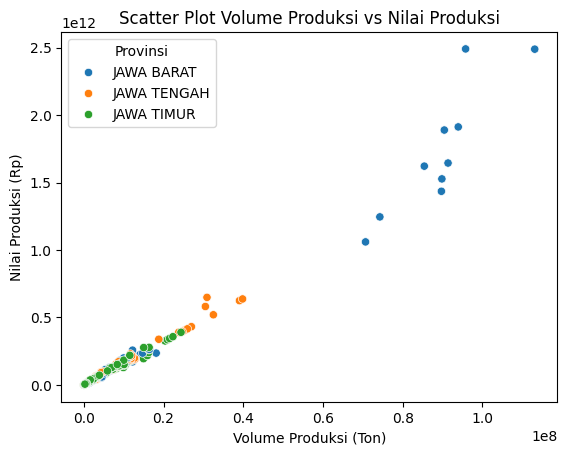

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame loaded from the CSV file

# 1. Verify column names:
print(data.columns)  # Print the actual column names in your DataFrame

# 2. Adjust column names in scatterplot if necessary:
# If the column name is different, correct it in the following line:
sns.scatterplot(data=data, x="Volume Produksi", y="Nilai Produksi", hue="Provinsi")

# Example: If the actual column name is 'volume_produksi', change the above line to:
# sns.scatterplot(data=data, x="volume_produksi", y="Nilai_Produksi", hue="Provinsi")

plt.title("Scatter Plot Volume Produksi vs Nilai Produksi")
plt.xlabel("Volume Produksi (Ton)")
plt.ylabel("Nilai Produksi (Rp)")
plt.show()

# ... (Rest of your code)

# Tahapan One Hot Encoding Provinsi

---



In [15]:
import pandas as pd

# Diasumsikan DataFrame Anda bernama 'data'
encoded_data = pd.get_dummies(data, columns=['Provinsi'], prefix=['Prov'])
print(encoded_data.head())

   Id Kabupaten/Kota Jenis Ikan  Tahun  Volume Produksi  Nilai Produksi  \
0 NaN        BANDUNG       LELE   2019          5372785     85964560000   
1 NaN  BANDUNG BARAT       LELE   2019          1328082     19921230000   
2 NaN         BEKASI       LELE   2019          2019121     34325057000   
3 NaN          BOGOR       LELE   2019         89814340   1526843780000   
4 NaN         CIAMIS       LELE   2019         18162827    236116751000   

   Harga Lele  Prov_JAWA BARAT  Prov_JAWA TENGAH  Prov_JAWA TIMUR  
0     16000.0             True             False            False  
1     15000.0             True             False            False  
2     17000.0             True             False            False  
3     17000.0             True             False            False  
4     13000.0             True             False            False  


iini pake linear regresion

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asumsikan 'encoded_data' adalah DataFrame Anda setelah One-Hot Encoding
# Pisahkan fitur (X) dan target (y)
X = encoded_data.drop('Nilai Produksi', axis=1)
y = encoded_data['Volume Produksi']

# --- Perubahan di sini ---
# Konversi kolom 'Kabupaten/Kota' dan kolom non-numerik lainnya ke numerik
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce') # errors='coerce' will replace non-numeric values with NaN

X = X.fillna(0) # Fill NaN values with 0 (or another appropriate value)
# --- Akhir perubahan ---

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Menampilkan koefisien fitur
coefficients = pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})
print(coefficients)

Mean Squared Error: 1.311497061106208e-15
R-squared: 1.0
              Fitur     Koefisien
0                Id  0.000000e+00
1    Kabupaten/Kota  0.000000e+00
2        Jenis Ikan  0.000000e+00
3             Tahun  9.524142e-11
4   Volume Produksi  1.000000e+00
5        Harga Lele  1.476003e-11
6   Prov_JAWA BARAT -2.208293e-09
7  Prov_JAWA TENGAH  6.698693e-10
8   Prov_JAWA TIMUR  1.538424e-09


TES MENGGUNAKAN LSTM

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data Anda setelah di-encoding
# Asumsikan data sudah berada dalam DataFrame 'encoded_data'

# Pisahkan fitur (X) dan target (y)
X = encoded_data.drop(['Id', 'Kabupaten/Kota', 'Jenis Ikan', 'Volume Produksi'], axis=1)  # Menghapus kolom yang tidak diperlukan
y = encoded_data['Volume Produksi']

# Normalisasi fitur
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)  # Normalisasi fitur

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # Normalisasi target

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Ubah data menjadi bentuk yang sesuai untuk LSTM: (samples, timesteps, features)
# Di sini kita menggunakan 1 timestep karena tidak ada data berurutan (time series)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluasi model
y_pred = model.predict(X_test)

# Inversi normalisasi pada prediksi dan data asli
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Hitung MSE dan R-squared
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0143 
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0070
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0068
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062  
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.005